In [1]:
import pandas as pd
import seaborn as sns


# Анализ скорости изучения материала на курсе Yandex.Cloud инженер данных

In [2]:
file = 'Яндекс Облачные сервисы.md'

In [3]:
df  = pd.read_csv(file,sep=' ',skiprows=11) \
    .drop(0) \
    .drop(['|','|.1','|.2'],axis=1) \
    .rename({'День':'Day'},axis=1) \
    .fillna(method='ffill')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 1 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       23 non-null     object
 1   start     23 non-null     object
 2   stop      23 non-null     object
 3   progress  23 non-null     object
dtypes: object(4)
memory usage: 868.0+ bytes


In [5]:
# df.Day = pd.to_datetime(df.Day,format='%d.%m.%Y')
df['tstart'] = pd.to_datetime(df.Day + ' ' + df.start)
df['tstop'] = pd.to_datetime(df.Day + ' ' + df.stop)

C:\Users\al\AppData\Local\Temp\ipykernel_21940\1847058208.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['tstart'] = pd.to_datetime(df.Day + ' ' + df.start)
C:\Users\al\AppData\Local\Temp\ipykernel_21940\1847058208.py:3: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['tstop'] = pd.to_datetime(df.Day + ' ' + df.stop)


In [6]:
df['dt'] = df.tstop - df.tstart
df.progress = df.progress.str[:-1]
df.progress = pd.to_numeric(df.progress)
df['di'] = df.dt.cumsum()

<Axes: xlabel='di', ylabel='progress'>

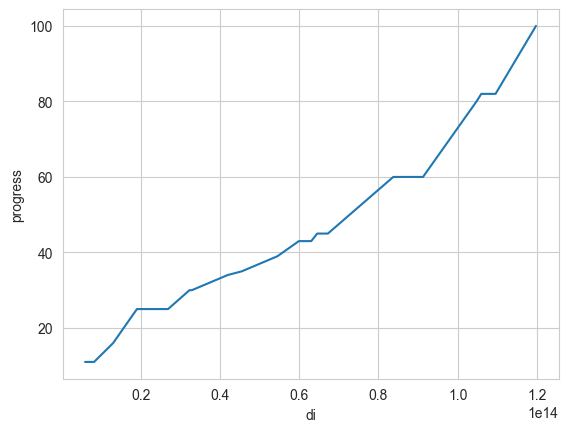

In [7]:
sns.lineplot(data=df,x='di',y='progress')

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
df['dt'] = df['dt'] / pd.Timedelta(minutes=1)
df['di'] = df['di'] / pd.Timedelta(minutes=1)

In [10]:
X = df.di.values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.progress.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [11]:
linear_regressor.score(X,Y)

0.962365674574145

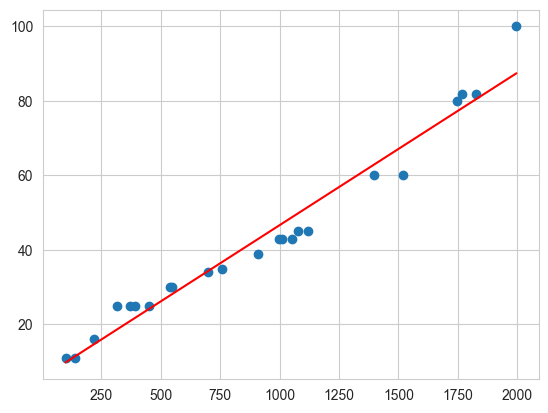

In [12]:
import matplotlib.pyplot as plt  # To visualize
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [13]:
print(linear_regressor.intercept_)
print(linear_regressor.coef_)

[5.69487757]
[[0.04095159]]


In [14]:
pace = linear_regressor.coef_ # progress per minute
# 1% per 25 minutes

Итого скорость обучения 1% курса за 25 минут

In [15]:
df.di.max()/60

33.266666666666666

Всего затрачено на курс 33,3 часа времени